In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import pickle

In [2]:
#import the data
final = pd.read_csv('Resources/done.csv')
final = final.drop(columns='Unnamed: 0')

In [3]:
leveler = {'A+':3, 'A': 4, 'Rk':6, 'A-':5, 'AAA': 1, 'AA':2, 'MLB': 0}
releveler = {3:'A+', 4:'A', 6:'Rk', 5:'A-', 1: 'AAA', 2 : 'AA', 0: 'MLB'}

In [4]:
final = final.replace({"TopLevel" : leveler})
final = final[final.PA > 30]

In [43]:
# AAA = final[final.Level == 1]
# AA = final[final.Level == 2]
# HiA = final[final.Level == 3]
# A = final[final.Level == 4]
# LoA = final[final.Level == 5]
# Rk = final[final.Level == 6]

In [27]:
# levels = [AAA, AA, HiA, A, LoA, Rk]

In [45]:
# PAmin = []
# insample = []
# outsample = []

# for i in range(0,101, 5):
#     final = final[final.PA > i]
# #Split it into X and Y
#     X = final[['Level', 'DaysOld', 'DEF', 'ISO', 'BB%', 'K%', 'SB%', 'BABIP']]
#     y = final.TopLevel
#     X = X.fillna(0)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# #If not scaling
#     X_train_scaled = X_train
#     X_test_scaled = X_test

# # Random forest Test
#     rf = RandomForestClassifier(n_estimators=25, max_depth=14)
#     rf = rf.fit(X_train, y_train)
#     PAmin.append(i)
#     insample.append(rf.score(X_train, y_train))
#     outsample.append(rf.score(X_test, y_test))              

In [11]:
# Pick a Level
final = final[final.Level == 3]

#Split it into X and Y
X = final[['DaysOld', 'DEF', 'ISO', 'BB%', 'K%', 'SB%', 'BABIP']]
y = final.TopLevel

In [12]:
X = X.fillna(0)

In [13]:
# An attempt to make all of the variables where high is good and low is bad for a machine learning model
X.DaysOld = X.DaysOld * -1
X['K%'] = X['K%'] * -1

In [51]:
# plt.plot(PAmin, insample, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
# plt.plot(PAmin, outsample, marker='', color='green', linewidth=2)
# plt.legend()

In [16]:
# Use train_test_split to create training and testing data


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [80]:
# Create a StandardScaler model and fit it to the training data


#NOTE: I think this will be unnecessary in the final moel because of the standard deviations?

# X_scaler = MinMaxScaler().fit(X_train)

In [17]:
# Transform the training and testing data using the X_scaler
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)


#If not scaling
X_train_scaled = X_train
X_test_scaled = X_test

In [18]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [20]:
# create a normal neural network with 31 inputs, 
# 31 hidden nodes in the first layer, 
# 26 in the second and 2 outputs

model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=7))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=4, activation='sigmoid'))

In [22]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 2s - loss: 1.3273 - acc: 0.3826
Epoch 2/100
 - 1s - loss: 1.2840 - acc: 0.4076
Epoch 3/100
 - 1s - loss: 1.2752 - acc: 0.4145
Epoch 4/100
 - 1s - loss: 1.2708 - acc: 0.4174
Epoch 5/100
 - 1s - loss: 1.2676 - acc: 0.4229
Epoch 6/100
 - 1s - loss: 1.2657 - acc: 0.4208
Epoch 7/100
 - 1s - loss: 1.2640 - acc: 0.4231
Epoch 8/100
 - 1s - loss: 1.2628 - acc: 0.4241
Epoch 9/100
 - 1s - loss: 1.2618 - acc: 0.4222
Epoch 10/100
 - 1s - loss: 1.2610 - acc: 0.4232
Epoch 11/100
 - 1s - loss: 1.2602 - acc: 0.4212
Epoch 12/100
 - 1s - loss: 1.2597 - acc: 0.4216
Epoch 13/100
 - 1s - loss: 1.2589 - acc: 0.4242
Epoch 14/100
 - 1s - loss: 1.2587 - acc: 0.4209
Epoch 15/100
 - 1s - loss: 1.2579 - acc: 0.4240
Epoch 16/100
 - 1s - loss: 1.2575 - acc: 0.4234
Epoch 17/100
 - 1s - loss: 1.2576 - acc: 0.4234
Epoch 18/100
 - 1s - loss: 1.2567 - acc: 0.4231
Epoch 19/100
 - 1s - loss: 1.2570 - acc: 0.4215
Epoch 20/100
 - 1s - loss: 1.2560 - acc: 0.4229
E

In [24]:
# See how it did.

model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 1.2753 - acc: 0.4184
Neural Network - Loss: 1.2752931658705022, Accuracy: 0.41840511560440063


In [25]:
# Random forest Test
rf = RandomForestClassifier(n_estimators=25, max_depth=14)
rf = rf.fit(X_train, y_train)
print(f'{round(rf.score(X_train, y_train),4)} in sample.')
print(f'{round(rf.score(X_test, y_test),4)} out of sample.')

0.8859 in sample.
0.4063 out of sample.


In [49]:
# depth = []
# estimators = []
# insample = []
# outsample = []
# for i in range(5,16):
#     for j in range(2,30):
#         depth.append(i)
#         estimators.append(j)
#         rf = RandomForestClassifier(n_estimators=j, max_depth=i).fit(X_train, y_train)
#         insample.append(rf.score(X_train, y_train))
#         outsample.append(rf.score(X_test, y_test))              

In [52]:
print(f'{max(insample)}')
print(f'{max(outsample)}')

0.7164836609902032
0.4710606402164112


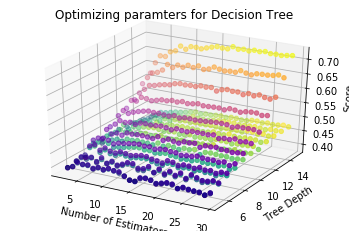

In [69]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional scatter plot
ax.scatter3D(estimators, depth, outsample, c=outsample, cmap='viridis')
ax.scatter3D(estimators, depth, insample, c=insample, cmap='plasma')
ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Tree Depth')
ax.set_zlabel('Score');
ax.set_title('Optimizing paramters for Decision Tree');
plt.savefig("Models/RandForest1.png")

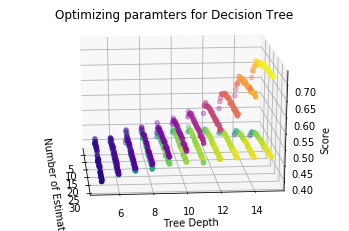

<Figure size 432x288 with 0 Axes>

In [70]:
ax.view_init(20, -5)
plt.savefig("Models/RandForest2.png")
fig

No handles with labels found to put in legend.


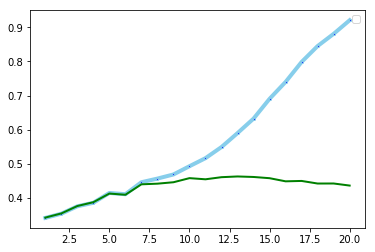

In [45]:
plt.plot(depth, insample, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
plt.plot(depth, outsample, marker='', color='green', linewidth=2)
plt.legend()

No handles with labels found to put in legend.


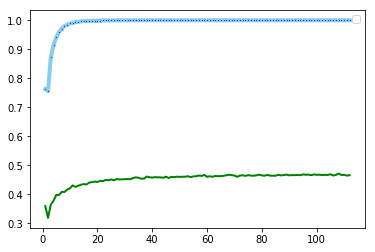

In [30]:
plt.plot(estimators, insample, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
plt.plot(estimators, outsample, marker='', color='green', linewidth=2)
plt.legend()

In [26]:
[(x[0], x[1]) for x in zip(rf.feature_importances_, X.columns)]

[(0.1745490087415922, 'DaysOld'),
 (0.13009547699114044, 'DEF'),
 (0.15212706067711054, 'ISO'),
 (0.12044358595739219, 'BB%'),
 (0.1541149703885019, 'K%'),
 (0.12701280684831456, 'SB%'),
 (0.14165709039594826, 'BABIP')]

In [42]:
depth = []
for i in range(1,21):
    depth.append(i)

In [27]:
#Decision Tree Classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.32368775235531627

In [54]:
# print(f"Predicted class: {model.predict_classes(X_test_scaled[:15])}")

# print(f"Actual Labels: {list(y_test[:15])}")

Predicted class: [6 6 6 0 3 6 0 6 6 6 6 1 6 6 6]
Actual Labels: [4, 1, 6, 3, 2, 6, 3, 6, 4, 6, 6, 3, 6, 6, 2]


In [13]:
rf.score(X_train, y_train)

0.9885124409419235

In [15]:
rf.score(X_test, y_test)

0.4198320559062218

In [29]:
final[['MHiA', 'MAA', 'MAAA', 'MMLB']] = model.predict(X)

KeyError: "['MHiA' 'MAA' 'MAAA' 'MMLB'] not in index"

In [32]:
final['Predicted'] = rf.predict(X)

In [31]:
final['Random'] = np.random.randint(1, 6, final.shape[0])
final['Pop'] = 0
final['UpTwo'] = (final.Level - 2)
final.UpTwo = final.UpTwo.map({-1 : 0, 0:0, 1:1, 2:2, 3:3, 4:4, 5:5})
final['UpOne'] = final.Level - 1

In [100]:
sum(1 for x,y in zip(final.TopLevel,final.Level) if x == y) / len(final.TopLevel)

0.2805193341364274

In [103]:
Model = 46.8%
Random = 11.5%
UpTwo = 31.1%
UpOne = 29.6%
Pop = 34.1%
Level = 28.1%

SyntaxError: invalid syntax (<ipython-input-103-840717d52bbe>, line 1)

In [35]:
final[final['firstName'] == 'Vladimir']

,playerid,TopLevel,year,teamName,League,Level,orgName,lastName,firstName,Bats,...,BB%,K%,SB%,BABIP,DaysOld,Random,Pop,UpTwo,UpOne,Predicted
69331,203172,MLB,2017,Dunedin,FSL,A+,TOR,Guerrero,Vladimir,R,...,1.645623,-0.736960,0.261998,0.519652,-2.061351,AA,MLB,AAA,AA,MLB
69974,915,MLB,1996,West Palm Beach,FSL,A+,MON,Guerrero,Vladimir,R,...,-1.016516,-0.625536,0.099807,0.685442,-0.734147,AAA,MLB,AAA,AA,MLB
164969,5661,AAA,2002,Brevard County,FSL,A+,MON,Hernandez,Vladimir,R,...,-0.419595,-0.640327,0.625788,0.283552,0.950936,A-,MLB,AAA,AA,AAA
186493,46112,AAA,2012,Daytona,FSL,A+,CHN,Frias,Vladimir,B,...,0.226422,-0.157119,0.326684,1.211019,0.592764,AAA,MLB,AAA,AA,AAA
186496,46112,AAA,2011,Salem,Caro,A+,BOS,Frias,Vladimir,B,...,0.594425,-0.184193,0.120847,-0.746154,0.654356,A,MLB,AAA,AA,AAA
186499,46112,MLB,2009,San Jose,Calif,A+,SFN,Frias,Vladimir,B,...,0.211886,-0.072227,0.088455,-0.406578,-0.438412,A,MLB,AAA,AA,A+


In [119]:
#Saved the model
model.save("Rk_Model.h5")

In [42]:
final.columns

Index(['playerid', 'TopLevel', 'year', 'teamName', 'League', 'Level',
       'orgName', 'lastName', 'firstName', 'Bats', 'Throws', 'posit',
       'borndate', 'mlbid', 'PA', 'AVG', 'SLG', 'OBP', 'OPS', 'Age', 'HT',
       'WT', 'DEF', 'ISO', 'BB%', 'K%', 'SB%', 'BABIP', 'DaysOld', 'Random',
       'Pop', 'UpTwo', 'UpOne', 'Predicted'],
      dtype='object')

In [53]:
final['Name'] = final.firstName + " " + final.lastName

In [49]:
final = final.rename(columns={"BB%": 'BB', "K%": "K", 'SB%': 'SB'})

In [54]:
final = final.round({'AVG': 3, 'SLG': 3, 'OBP': 3, 'OPS': 3, 'Age': 3, 'HT': 3, 'WT': 3, 'DEF': 3, 'ISO': 3, 'BB%': 3, 'K%': 3, 'SB%': 3, 'BABIP': 3, 'DaysOld': 3})
final.head()

,playerid,TopLevel,year,teamName,League,Level,orgName,lastName,firstName,Bats,...,K,SB,BABIP,DaysOld,Random,Pop,UpTwo,UpOne,Predicted,Name
0,1509,A+,1988,Charlotte,FSL,A+,TEX,Paula,Julio,B,...,-0.379,-1.175,-0.433,3.175,AAA,MLB,AAA,AA,AAA,Julio Paula
4,1509,A+,1981,Kinston,Caro,A+,TOR,Paula,Julio,B,...,-0.560,0.531,0.158,0.145,A,MLB,AAA,AA,A+,Julio Paula
5,1509,A+,1980,Kinston,Caro,A+,TOR,Paula,Julio,B,...,-0.440,0.143,-0.214,-0.337,AA,MLB,AAA,AA,A+,Julio Paula
6,1509,A+,1983,Lynchburg,Caro,A+,NYN,Paula,Julio,B,...,-0.021,0.552,-0.229,1.008,AA,MLB,AAA,AA,A+,Julio Paula
7,1509,A+,1984,Lynchburg,Caro,A+,NYN,Paula,Julio,B,...,-0.577,0.985,0.284,1.123,A+,MLB,AAA,AA,AAA,Julio Paula


In [34]:
final = final.replace({"TopLevel" : releveler, "Level" : releveler, "Predicted" : releveler, "Random" : releveler, "Pop" : releveler, "UpTwo" : releveler, "UpOne" : releveler, "Predicted" : releveler})

In [139]:
final.to_csv("Predicts.csv")

In [104]:
filename = "Models/randomforest.h5"

In [105]:
pickle.dump(rf, open(filename, 'wb'))

In [37]:
import sqlite3

In [38]:
con = sqlite3.connect("sqlite:///../Models/model.sqlite")
cur = con.cursor()

In [55]:
final.to_sql('Modeldata', con, if_exists='replace', index=False)

In [56]:
example = pd.read_sql_query("SELECT * from Modeldata WHERE firstName='Vladimir'", con)

In [57]:
example

,playerid,TopLevel,year,teamName,League,Level,orgName,lastName,firstName,Bats,...,K,SB,BABIP,DaysOld,Random,Pop,UpTwo,UpOne,Predicted,Name
0,203172,MLB,2017,Dunedin,FSL,A+,TOR,Guerrero,Vladimir,R,...,-0.737,0.262,0.520,-2.061,AA,MLB,AAA,AA,MLB,Vladimir Guerrero
1,915,MLB,1996,West Palm Beach,FSL,A+,MON,Guerrero,Vladimir,R,...,-0.626,0.100,0.685,-0.734,AAA,MLB,AAA,AA,MLB,Vladimir Guerrero
2,5661,AAA,2002,Brevard County,FSL,A+,MON,Hernandez,Vladimir,R,...,-0.640,0.626,0.284,0.951,A-,MLB,AAA,AA,AAA,Vladimir Hernandez
3,46112,AAA,2012,Daytona,FSL,A+,CHN,Frias,Vladimir,B,...,-0.157,0.327,1.211,0.593,AAA,MLB,AAA,AA,AAA,Vladimir Frias
4,46112,AAA,2011,Salem,Caro,A+,BOS,Frias,Vladimir,B,...,-0.184,0.121,-0.746,0.654,A,MLB,AAA,AA,AAA,Vladimir Frias
5,46112,MLB,2009,San Jose,Calif,A+,SFN,Frias,Vladimir,B,...,-0.072,0.088,-0.407,-0.438,A,MLB,AAA,AA,A+,Vladimir Frias
